In [ ]:
# 1) Our estimated slope is 1.87, which means for every one unit of increase in x, our y value will increase by 1.87 on average.

# 2) 89% of the variability in y is can be attributed to a linear model in which x is the predictor variable.

# 3) y = 9.18

In [4]:
import pandas as pd
import statsmodels.formula.api as smf

# importing csv 
batting = pd.read_csv('Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [15]:
# creating aggregated data
batting_agg = batting.groupby('playerID')[['HR', 'AB', 'SO']].sum()
batting_agg.head()

,HR,AB,SO
playerID,,,
aardsda01,0,4,2.0
aaronha01,755,12364,1383.0
aaronto01,13,944,145.0
aasedo01,0,5,3.0
abadan01,0,21,5.0


In [18]:
batting_agg = batting_agg[batting_agg['AB'] >= 5000]
batting_agg.head()

,HR,AB,SO
playerID,,,
aaronha01,755,12364,1383.0
abreubo01,288,8480,1840.0
adamssp01,9,5557,223.0
adcocjo01,336,6606,1059.0
alfoned01,146,5385,617.0


In [21]:
# calculating hr rate
batting_agg['hr_rate'] = batting_agg['HR'] / batting_agg['AB']

# calculating strikeout rate
batting_agg['so_rate'] = batting_agg['SO'] / batting_agg['AB']

batting_agg.head()

,HR,AB,SO,hr_rate,so_rate
playerID,,,,,
aaronha01,755,12364,1383.0,0.061064,0.111857
abreubo01,288,8480,1840.0,0.033962,0.216981
adamssp01,9,5557,223.0,0.001620,0.040130
adcocjo01,336,6606,1059.0,0.050863,0.160309
alfoned01,146,5385,617.0,0.027112,0.114578


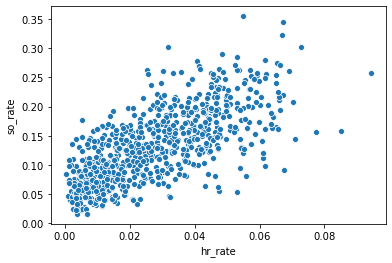

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating scatterplot between homerun rate and strikeout rate
sns.scatterplot(x = 'hr_rate', y = 'so_rate', data = batting_agg)

In [30]:
# building linear regression model
lm_md = smf.ols(formula = 'so_rate ~ hr_rate', data = batting_agg).fit()

# extracting model results
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                so_rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     872.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.91e-130
Time:                        11:51:15   Log-Likelihood:                 1395.3
No. Observations:                 806   AIC:                            -2787.
Df Residuals:                     804   BIC:                            -2777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0620      0.003     23.261      0.000       0.057       0.067
hr_rate        2.4907      0.084     29.540      0.000       2.325       2.656
==============================================================================
Omnibus:                       15.653   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.475
Skew:                           0.236   Prob(JB):                     5.90e-05
Kurtosis:                       3.598   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# creating new data frame when hr rate is 0.05
new_data = pd.DataFrame({'hr_rate' : [0.05]})

# predicting our strikeout rate when hr rate is 0.05
lm_md.predict(new_data)

## our strikeout rate for a homerun rate of 0.05 is 0.1865

0    0.186524
dtype: float64